### Loading Pickle File

In [3]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Loading Model
loaded_model = load_model('olympics_pipeline')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Height', 'Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex', 'region', 'Season', 'City',
                                             'Spor...
NaN   -1
dtype: int64},
                                                                        {'col': 'Season',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Summer    0
Winter    1
NaN      -1
dtype: int64}]))),
                ('rest_encoding',
                 TransformerWrapper(include=['region', 'City', 'Sport'],
                                    transformer=LeaveOneOutEncoder(cols=['region',
                                                                         'City',
                                                                         'Sport'],
                                                                   handle_missing='return_nan',
                                                                   random_state=4805))),
                ('trained_model',
                 ExtraTreesClassifier(n_jobs=-1, random_state=4805))])

In [8]:
# predict on new data
unseen_data = pd.read_csv('./Data/olympics_unseen.csv')
unseen_pred = predict_model(loaded_model, data = unseen_data)
unseen_pred

,Name,Age,Sex,Height,Weight,Year,Team,NOC,region,Games,Season,City,Sport,Event,Medal,prediction_label,prediction_score
0,Laura lodie Flessel-Colovic,28,F,171,55,2000,France,FRA,France,2000 Summer,Summer,Sydney,Fencing,"Fencing Women's epee, Team",None,None,0.57
1,Ding Feng,25,M,175,80,2012,China,CHN,China,2012 Summer,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Bronze,Bronze,0.40
2,Kirsten Strange-Campbell,28,F,176,64,1972,Denmark,DEN,Denmark,1972 Summer,Summer,Munich,Swimming,Swimming Women's 200 metres Individual Medley,None,None,1.00
3,Raymond Camille Dot,25,M,175,70,1952,France,FRA,France,1952 Summer,Summer,Helsinki,Gymnastics,Gymnastics Men's Horse Vault,None,None,1.00
4,Leevan Sands,26,M,191,82,2008,Bahamas,BAH,Bahamas,2008 Summer,Summer,Beijing,Athletics,Athletics Men's Triple Jump,Bronze,None,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,Yuriy Mykolaiovych Filatov,27,M,190,90,1976,Soviet Union,URS,Russia,1976 Summer,Summer,Montreal,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Gold,0.89
59996,Khalid Skah,29,M,170,60,1996,Morocco,MAR,Morocco,1996 Summer,Summer,Atlanta,Athletics,"Athletics Men's 10,000 metres",None,None,0.99
59997,Micha Boruciski,46,M,175,70,1932,Poland,POL,Poland,1932 Summer,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",None,None,1.00
59998,Tsagaandorjiin Gndegmaa,22,F,152,51,1968,Mongolia,MGL,Mongolia,1968 Summer,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,None,None,1.00


In [11]:
## Creating a confusion matrix
y_true = unseen_pred['Medal']
y_pred = unseen_pred['prediction_label']
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 2129,    48,   788,     4],
       [   39,  2232,   802,    14],
       [    5,    14, 50866,    13],
       [    3,     9,  1027,  2007]], dtype=int64)

In [13]:
id = unseen_pred['Medal'].unique()
cm_df = pd.DataFrame(cm, index = id, columns = id)
cm_df

,None,Bronze,Gold,Silver
None,2129,48,788,4
Bronze,39,2232,802,14
Gold,5,14,50866,13
Silver,3,9,1027,2007


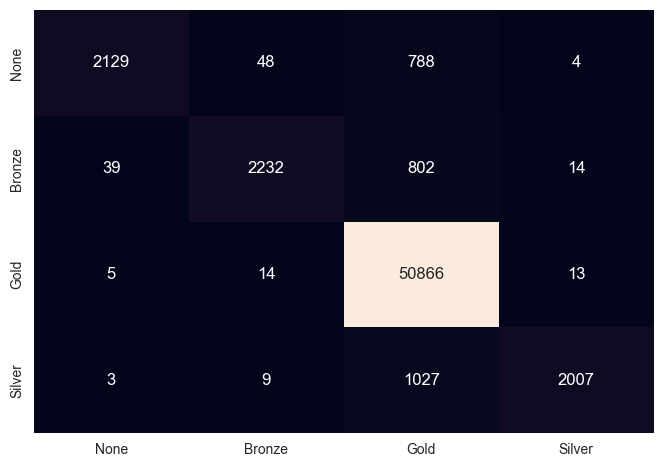

In [16]:
sns.heatmap(data = cm_df, annot=True, fmt = '00', cbar=False);